# ADS Assignment 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Titanic Ship Case Study
Problem Description: On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.

1. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
2. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills.

# Load the dataset

In [2]:
data = pd.read_csv('titanic.csv')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# Visualizations

### Univariate Analysis 

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

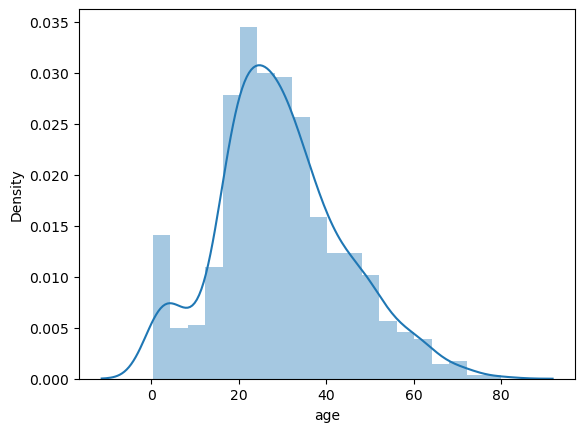

In [6]:
# age
sns.distplot(data.age)

Text(0.5, 1.0, 'Age group')

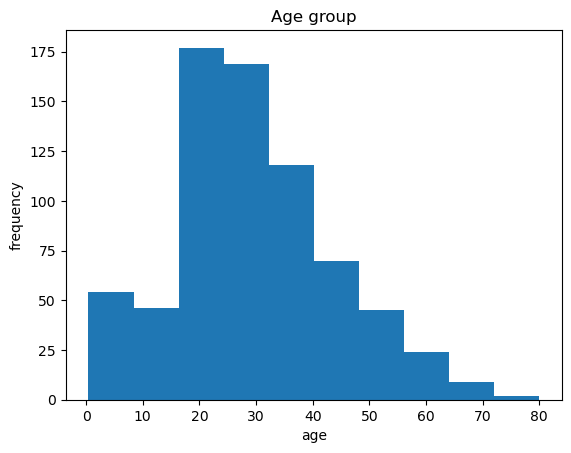

In [7]:
#age
plt.hist(data['age'])
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age group')

Text(0.5, 1.0, 'Sex group')

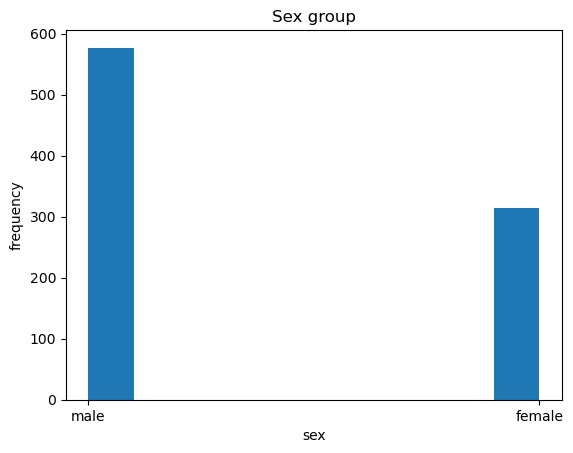

In [8]:
#sex group
plt.hist(data['sex'])
plt.xlabel('sex')
plt.ylabel('frequency')
plt.title('Sex group')

Text(0.5, 1.0, 'Class group')

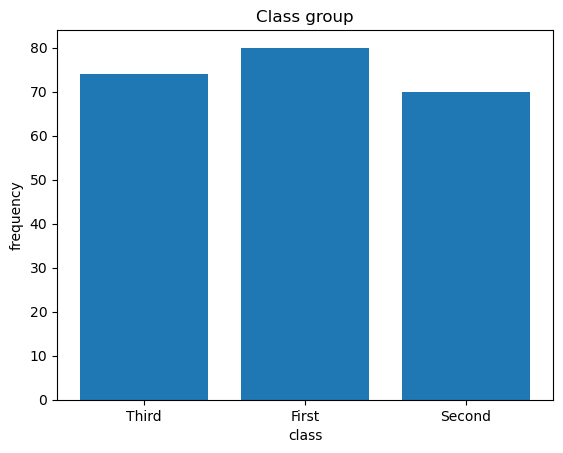

In [9]:
#class group
plt.bar(data['class'],data['age'])
plt.xlabel('class')
plt.ylabel('frequency')
plt.title('Class group')

In [10]:
# alive group
alive = data['alive'].value_counts()
alive

no     549
yes    342
Name: alive, dtype: int64

Text(0.5, 1.0, 'Alive or Died')

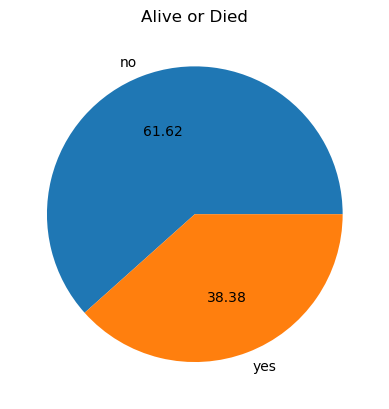

In [11]:
label=data['alive'].unique()
plt.pie(alive,autopct="%.2f",labels=label)
plt.title("Alive or Died")

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare')

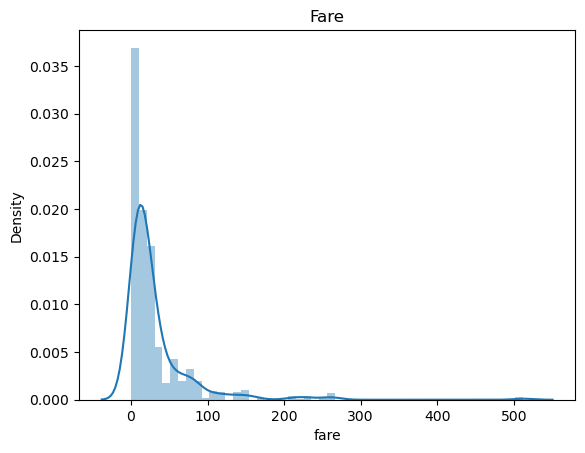

In [12]:
#fare
sns.distplot(data.fare)
plt.title("Fare")

## Bivariate Analysis

Text(0.5, 1.0, 'Sex v/s Who')

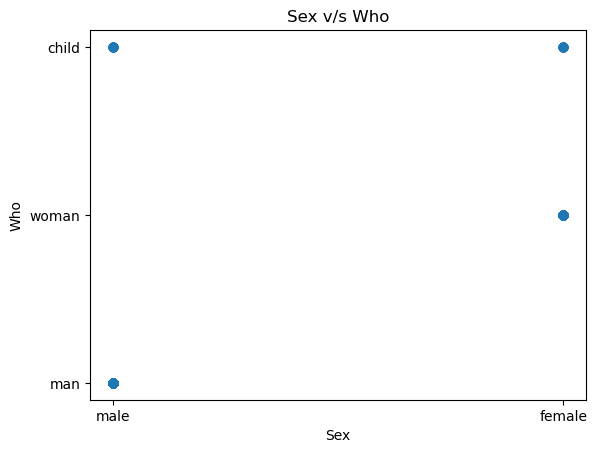

In [13]:
# sex v/s who
plt.scatter(data['sex'],data['who'])
plt.xlabel('Sex')
plt.ylabel('Who')
plt.title('Sex v/s Who')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age vs Fare')

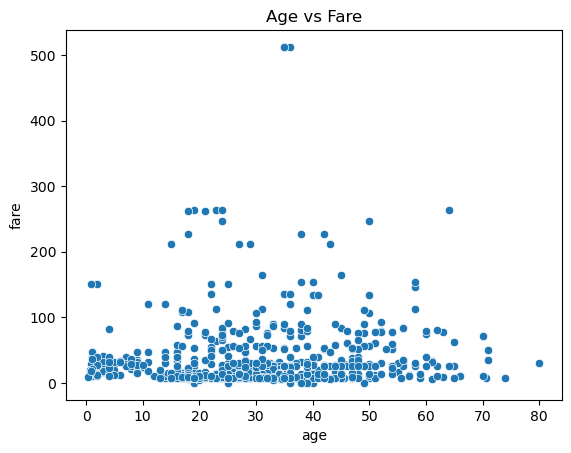

In [14]:
# age vs fare
sns.scatterplot(data['age'],data['fare'])
plt.title('Age vs Fare')

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'pclass vs Fare')

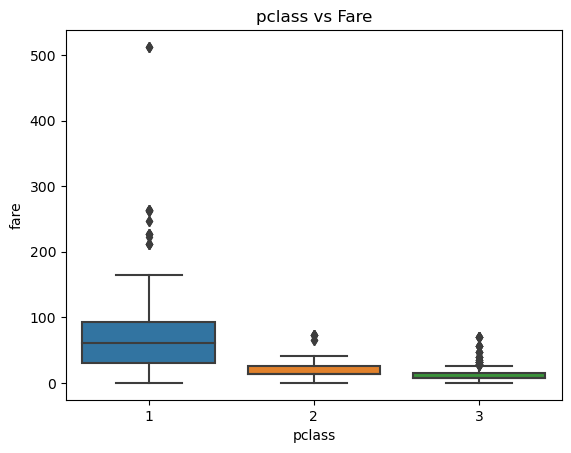

In [15]:
# pclass vs fare
sns.boxplot(data['pclass'],data['fare'])
plt.title('pclass vs Fare')

## MultiVariate Analysis

<AxesSubplot:>

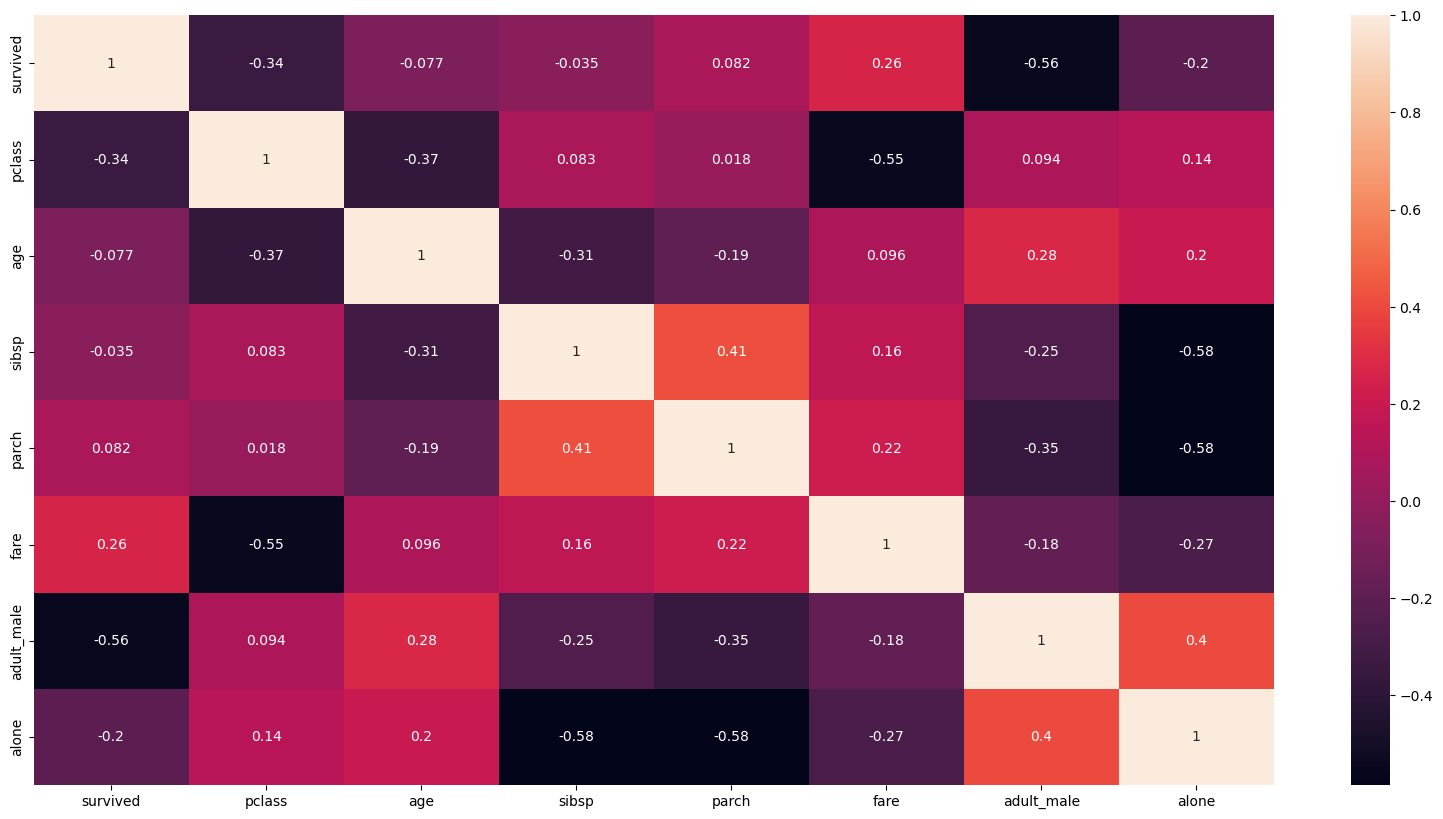

In [16]:
plt.figure(figsize = (20,10))        
sns.heatmap(data.corr(),annot = True)

# Perform descriptive statistics on the dataset

In [17]:
#summary of all the data
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


{'whiskers': [<matplotlib.lines.Line2D at 0x196952d17c0>,
 'caps': [<matplotlib.lines.Line2D at 0x196952d1d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x196952d14f0>],
 'medians': [<matplotlib.lines.Line2D at 0x196952df340>],
 'fliers': [<matplotlib.lines.Line2D at 0x196952df610>],
 'means': []}

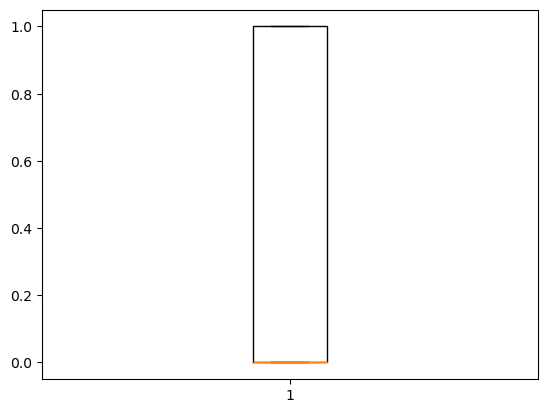

In [18]:
#box plot
plt.boxplot(data['survived'])

{'whiskers': [<matplotlib.lines.Line2D at 0x196953368b0>,
 'caps': [<matplotlib.lines.Line2D at 0x19695336e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x196953365e0>],
 'medians': [<matplotlib.lines.Line2D at 0x19695342430>],
 'fliers': [<matplotlib.lines.Line2D at 0x19695342700>],
 'means': []}

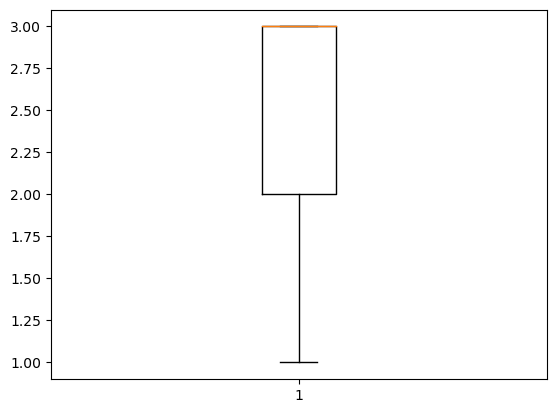

In [19]:
#box plot
plt.boxplot(data['pclass'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1969535acd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1969536b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1969535aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1969536b850>],
 'fliers': [<matplotlib.lines.Line2D at 0x1969536bb20>],
 'means': []}

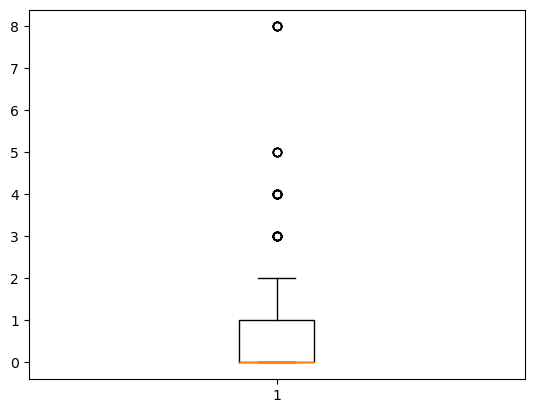

In [20]:
#box plot
plt.boxplot(data['sibsp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x196953d2310>,
 'caps': [<matplotlib.lines.Line2D at 0x196953d28b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x196953d2040>],
 'medians': [<matplotlib.lines.Line2D at 0x196953d2e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x196953e2160>],
 'means': []}

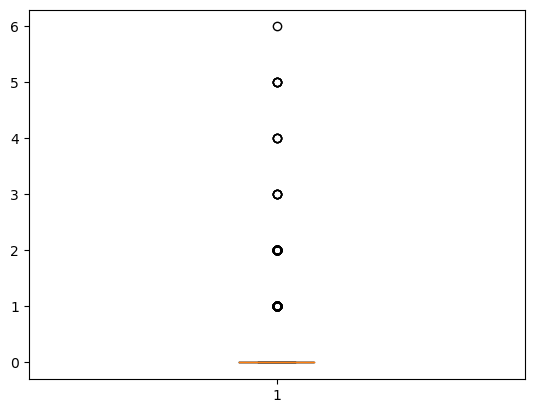

In [21]:
#box plot
plt.boxplot(data['parch'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1969541ecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1969542c250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1969541ea00>],
 'medians': [<matplotlib.lines.Line2D at 0x1969542c7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1969542cac0>],
 'means': []}

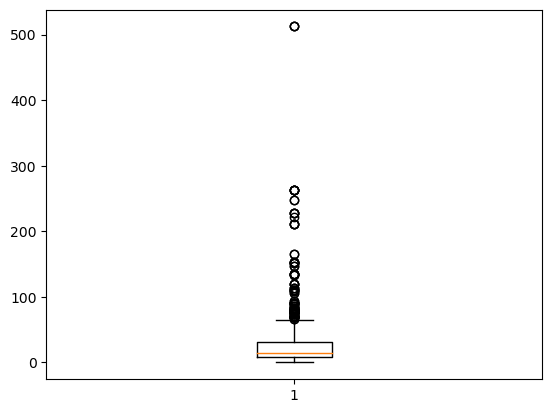

In [22]:
#box plot
plt.boxplot(data['fare'])

# Handle the Missing values

In [23]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [25]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [26]:
# to fill age
data['age'].fillna(data['age'].mean(),inplace=True)

In [27]:
# to fill embarked
data['embarked'].fillna(data['embarked'].mode()[0],inplace=True)

In [28]:
# to fill deck
data['deck'].fillna(data['deck'].mode()[0],inplace=True)

In [29]:
# to fill embark_town
data['embark_town'].fillna(data['embark_town'].mode()[0],inplace=True)

In [30]:
data.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

# Find the outliers and replace the outliers 

In [31]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [32]:
data.shape

(891, 15)

In [33]:
min_threshold=data['fare'].quantile(0.25)
min_threshold

7.9104

In [34]:
max_threshold=data['fare'].quantile(0.75)
max_threshold

31.0

In [35]:
data[data.fare<min_threshold]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
14,0,3,female,14.000000,0,0,7.8542,S,Third,child,False,C,Southampton,no,True
19,1,3,female,29.699118,0,0,7.2250,C,Third,woman,False,C,Cherbourg,yes,True
26,0,3,male,29.699118,0,0,7.2250,C,Third,man,True,C,Cherbourg,no,True
28,1,3,female,29.699118,0,0,7.8792,Q,Third,woman,False,C,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,0,3,male,19.000000,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
878,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
881,0,3,male,33.000000,0,0,7.8958,S,Third,man,True,C,Southampton,no,True
884,0,3,male,25.000000,0,0,7.0500,S,Third,man,True,C,Southampton,no,True


In [36]:
data[data.fare>max_threshold]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.000000,0,0,51.8625,S,First,man,True,E,Southampton,no,True
13,0,3,male,39.000000,1,5,31.2750,S,Third,man,True,C,Southampton,no,False
23,1,1,male,28.000000,0,0,35.5000,S,First,man,True,A,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,C,Southampton,yes,False
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,C,Southampton,no,False
867,0,1,male,31.000000,0,0,50.4958,S,First,man,True,A,Southampton,no,True
871,1,1,female,47.000000,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False


In [37]:
data1= data[(data.fare<max_threshold) & (data.fare>min_threshold)]
data1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,C,Queenstown,no,True
7,0,3,male,2.000000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False


In [38]:
data1.shape

(443, 15)

# Check for Categorical columns and perform encoding

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True


In [41]:
#enconding sex
le = LabelEncoder()
data.sex=le.fit_transform(data.sex)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,0,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,0,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,0,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,0,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,1,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [42]:
#encoding who
data.who=le.fit_transform(data.who)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,S,Third,1,True,C,Southampton,no,False
1,1,1,0,38.000000,1,0,71.2833,C,First,2,False,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,7.9250,S,Third,2,False,C,Southampton,yes,True
3,1,1,0,35.000000,1,0,53.1000,S,First,2,False,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,8.0500,S,Third,1,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,S,Second,1,True,C,Southampton,no,True
887,1,1,0,19.000000,0,0,30.0000,S,First,2,False,B,Southampton,yes,True
888,0,3,0,29.699118,1,2,23.4500,S,Third,2,False,C,Southampton,no,False
889,1,1,1,26.000000,0,0,30.0000,C,First,1,True,C,Cherbourg,yes,True


In [43]:
#encoding embarked
data.embarked=le.fit_transform(data.embarked)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,True,C,Southampton,no,False
1,1,1,0,38.000000,1,0,71.2833,0,First,2,False,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,False,C,Southampton,yes,True
3,1,1,0,35.000000,1,0,53.1000,2,First,2,False,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,True,C,Southampton,no,True
887,1,1,0,19.000000,0,0,30.0000,2,First,2,False,B,Southampton,yes,True
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,False,C,Southampton,no,False
889,1,1,1,26.000000,0,0,30.0000,0,First,1,True,C,Cherbourg,yes,True


In [44]:
#encoding adult_male
data.adult_male=le.fit_transform(data.adult_male)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,1,C,Southampton,no,False
1,1,1,0,38.000000,1,0,71.2833,0,First,2,0,C,Cherbourg,yes,False
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,0,C,Southampton,yes,True
3,1,1,0,35.000000,1,0,53.1000,2,First,2,0,C,Southampton,yes,False
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,1,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,1,C,Southampton,no,True
887,1,1,0,19.000000,0,0,30.0000,2,First,2,0,B,Southampton,yes,True
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,0,C,Southampton,no,False
889,1,1,1,26.000000,0,0,30.0000,0,First,1,1,C,Cherbourg,yes,True


In [45]:
#encoding alive
data.alive=le.fit_transform(data.alive)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,1,C,Southampton,0,False
1,1,1,0,38.000000,1,0,71.2833,0,First,2,0,C,Cherbourg,1,False
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,0,C,Southampton,1,True
3,1,1,0,35.000000,1,0,53.1000,2,First,2,0,C,Southampton,1,False
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,1,C,Southampton,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,1,C,Southampton,0,True
887,1,1,0,19.000000,0,0,30.0000,2,First,2,0,B,Southampton,1,True
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,0,C,Southampton,0,False
889,1,1,1,26.000000,0,0,30.0000,0,First,1,1,C,Cherbourg,1,True


In [46]:
#encoding embark town
data.embark_town=le.fit_transform(data.embark_town)
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,Third,1,1,C,2,0,False
1,1,1,0,38.000000,1,0,71.2833,0,First,2,0,C,0,1,False
2,1,3,0,26.000000,0,0,7.9250,2,Third,2,0,C,2,1,True
3,1,1,0,35.000000,1,0,53.1000,2,First,2,0,C,2,1,False
4,0,3,1,35.000000,0,0,8.0500,2,Third,1,1,C,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,Second,1,1,C,2,0,True
887,1,1,0,19.000000,0,0,30.0000,2,First,2,0,B,2,1,True
888,0,3,0,29.699118,1,2,23.4500,2,Third,2,0,C,2,0,False
889,1,1,1,26.000000,0,0,30.0000,0,First,1,1,C,0,1,True


In [47]:
## label encoding
column_types = data.dtypes
categorical_columns = column_types[column_types == 'object'].index
categorical_columns

Index(['class', 'deck'], dtype='object')

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
le = LabelEncoder()
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])

In [50]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,0,True


# Split the data into dependent and independent variables

In [51]:
y = data['alive']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: alive, dtype: int32

In [52]:
X= data.drop(columns=['alive'],axis=1)
X.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,1,2,2,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,0,2,0,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,0,2,2,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,0,2,2,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,1,2,2,True


## Scaling the independent variables

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
X_s = scaler.fit_transform(X)
X_s

array([[0.        , 1.        , 1.        , ..., 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.33333333, 1.        ,
        1.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.33333333, 1.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.33333333, 0.        ,
        1.        ],
       [0.        , 1.        , 1.        , ..., 0.33333333, 0.5       ,
        1.        ]])

In [56]:
X = pd.DataFrame(X_s, columns = X.columns)
X

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,1.0,0.5,1.0,0.333333,1.0,0.0
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,0.0,1.0,0.0,0.333333,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0,1.0,1.0,0.0,0.333333,1.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,1.0,0.0,0.333333,1.0,0.0
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,1.0,0.5,1.0,0.333333,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0,0.5,0.5,1.0,0.333333,1.0,1.0
887,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,1.0,0.0,0.166667,1.0,1.0
888,0.0,1.0,0.0,0.367921,0.125,0.333333,0.045771,1.0,1.0,1.0,0.0,0.333333,1.0,0.0
889,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0,0.0,0.5,1.0,0.333333,0.0,1.0


# Splitting the data into training and testing

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
140,0.0,1.0,0.0,0.367921,0.000,0.333333,0.029758,0.0,1.0,1.0,0.0,0.333333,0.0,0.0
439,0.0,0.5,1.0,0.384267,0.000,0.000000,0.020495,1.0,0.5,0.5,1.0,0.333333,1.0,1.0
817,0.0,0.5,1.0,0.384267,0.125,0.166667,0.072227,0.0,0.5,0.5,1.0,0.333333,0.0,0.0
378,0.0,1.0,1.0,0.246042,0.000,0.000000,0.007832,0.0,1.0,0.5,1.0,0.333333,0.0,1.0
491,0.0,1.0,1.0,0.258608,0.000,0.000000,0.014151,1.0,1.0,0.5,1.0,0.333333,1.0,1.0


In [59]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: alive, Length: 712, dtype: int32

In [60]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: alive, Length: 179, dtype: int32